## CAPM from Chat GPT

#!pip install yfinance 

In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import plotly.express as px

- Define your stock and market index symbols, as well as the risk-free rate (usually the 10-year Treasury yield).

- Retrieve historical data for your chosen stock and the market index using a library like pandas_datareader or by loading a CSV file with historical price data.

- Calculate the daily returns for both the stock and the market index.

- Calculate the excess returns of the stock by subtracting the risk-free rate from the stock's daily returns.

- Calculate the excess returns of the market by subtracting the risk-free rate from the market index's daily returns.

- Calculate the beta coefficient, which measures the stock's volatility relative to the market index. You can use linear regression to estimate the beta.

- Calculate the expected return of the stock using the CAPM formula:

In [43]:
# Define stock and market index symbols
stock_symbol = 'AAPL'
market_index_symbol = '^GSPC'  # S&P 500 index
risk_free_rate = 0.02  # 10-year Treasury yield

# Define the date range
start_date = '2020-01-01'
end_date = '2021-12-31'

In [44]:

# Download historical data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
market_data = yf.download(market_index_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
stock_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.249016,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.536896,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.771011,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,73.941643,132079200
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,174.518234,68356600
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,178.527771,74919600
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,177.498154,79144300


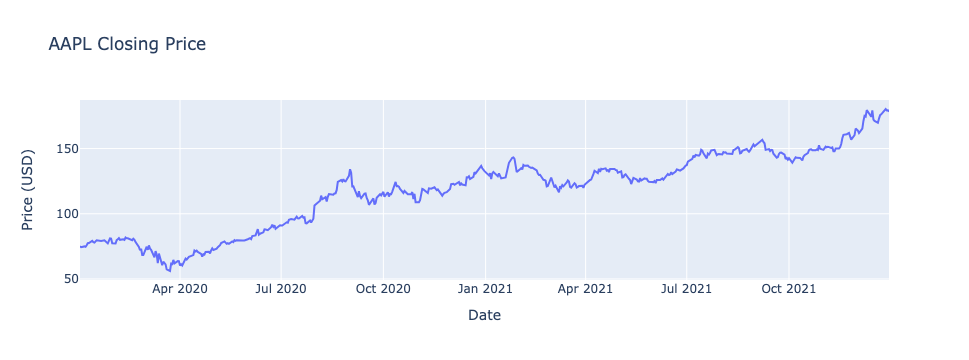

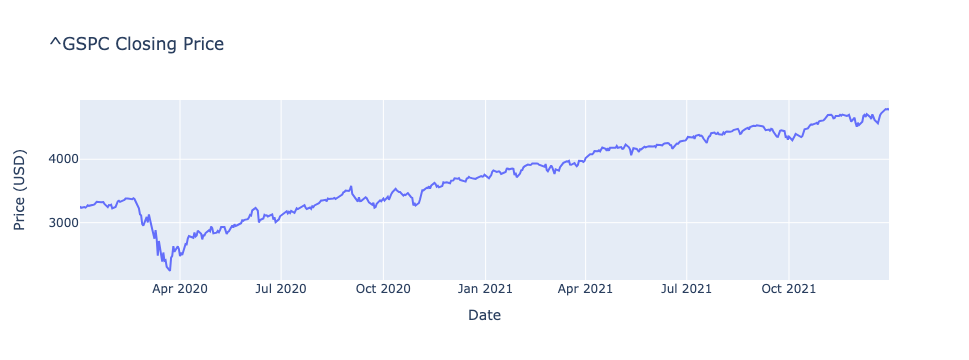

In [46]:
stock_df = stock_data.reset_index()
market_df = market_data.reset_index()

# Create line plots for stock closing price and market index closing price
fig_stock = px.line(stock_df, x='Date', y='Close', title=f'{stock_symbol} Closing Price')
fig_stock.update_xaxes(title_text='Date')
fig_stock.update_yaxes(title_text='Price (USD)')

fig_market = px.line(market_df, x='Date', y='Close', title=f'{market_index_symbol} Closing Price')
fig_market.update_xaxes(title_text='Date')
fig_market.update_yaxes(title_text='Price (USD)')

# Show the plots
fig_stock.show()
fig_market.show()








In [47]:

# Calculate daily returns
stock_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()
market_returns

Date
2020-01-03 00:00:00-05:00   -0.007060
2020-01-06 00:00:00-05:00    0.003533
2020-01-07 00:00:00-05:00   -0.002803
2020-01-08 00:00:00-05:00    0.004902
2020-01-09 00:00:00-05:00    0.006655
                               ...   
2021-12-23 00:00:00-05:00    0.006224
2021-12-27 00:00:00-05:00    0.013839
2021-12-28 00:00:00-05:00   -0.001010
2021-12-29 00:00:00-05:00    0.001402
2021-12-30 00:00:00-05:00   -0.002990
Name: Adj Close, Length: 503, dtype: float64

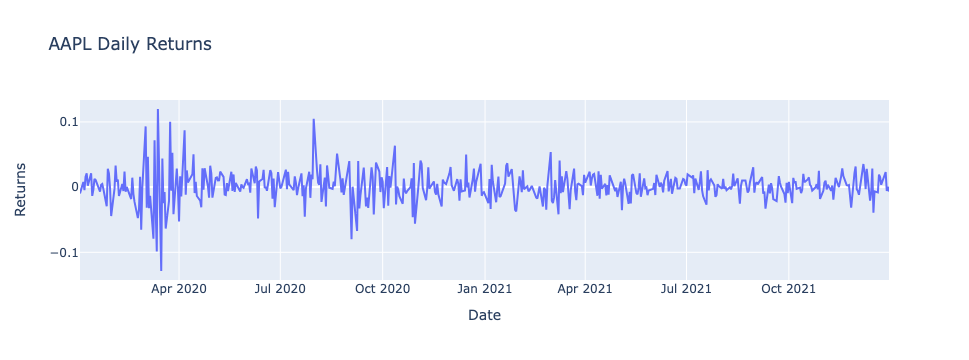

In [48]:
SR = pd.DataFrame({'Date': stock_returns.index, 'Returns': stock_returns})

# Create a line plot using Plotly Express
fig = px.line(SR, x='Date', y='Returns', title=f'{stock_symbol} Daily Returns')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Returns')

# Show the plot
fig.show()

In [49]:
# Calculate excess returns
excess_stock_returns = stock_returns - risk_free_rate
excess_market_returns = market_returns - risk_free_rate
excess_market_returns

Date
2020-01-03 00:00:00-05:00   -0.027060
2020-01-06 00:00:00-05:00   -0.016467
2020-01-07 00:00:00-05:00   -0.022803
2020-01-08 00:00:00-05:00   -0.015098
2020-01-09 00:00:00-05:00   -0.013345
                               ...   
2021-12-23 00:00:00-05:00   -0.013776
2021-12-27 00:00:00-05:00   -0.006161
2021-12-28 00:00:00-05:00   -0.021010
2021-12-29 00:00:00-05:00   -0.018598
2021-12-30 00:00:00-05:00   -0.022990
Name: Adj Close, Length: 503, dtype: float64

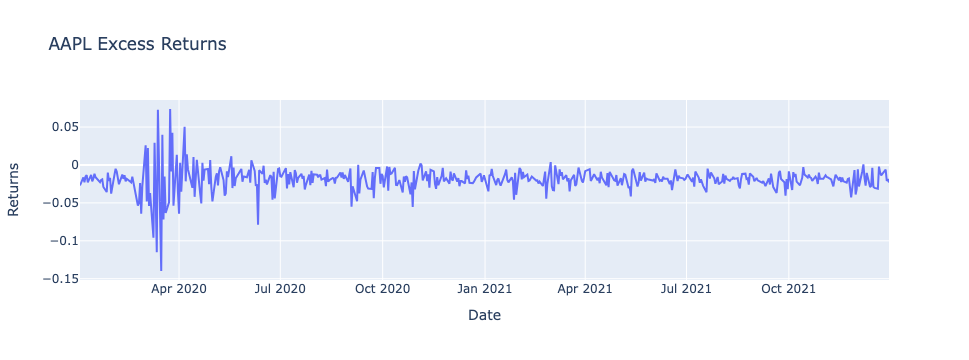

In [50]:
XR = pd.DataFrame({'Date': excess_market_returns.index, 'Returns': excess_market_returns})

# Create a line plot using Plotly Express
fig = px.line(XR, x='Date', y='Returns', title=f'{stock_symbol} Excess Returns')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Returns')

# Show the plot
fig.show()

In [51]:
# Perform linear regression to estimate beta
X = sm.add_constant(excess_market_returns)
model = sm.OLS(excess_stock_returns, X).fit()
beta = model.params['Adj Close']

In [52]:
# Calculate expected return using CAPM
market_return = np.mean(excess_market_returns)
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

In [53]:
print(f"Stock Beta: {beta:.3f}")
print(f"Expected Return: {expected_return:.3f}")

Stock Beta: 1.146
Expected Return: -0.025



AAPL was not beating the Market for much of 2021
( but is actually 5% of the SNP?)









